In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [45]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
# Here first i have checked the percentage of missing values
# as we can see our training data here some of the features contain more than 70 % missing values, so better to drop them


round((train.isnull().sum()/len(train)*100),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

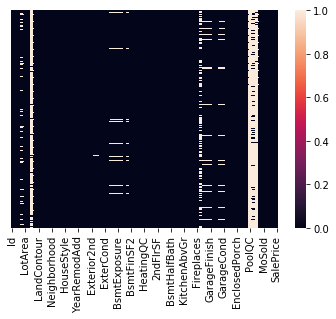

In [47]:
sns.heatmap(train.isnull(),yticklabels=False)


## Treating missing values

#### droping columns where missing values are more than 70% and which does not have any impact on target variable

In [48]:
train.drop(['Id','Alley','GarageYrBlt','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

### here i have run a for loop in our data set columns where type of values are categorical, this function will be fill missing value by mode() of that particular column

In [49]:
for column in train.columns:
    if train[column].dtype == type('int64'):
        train[column] = train[column].fillna(train[column].mean())
        
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [50]:
for column in train.columns:
    if train[column].dtype == type(object):
        train[column] = train[column].fillna(train[column].mode()[0])
        
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


### columns containing float values will be filled by mean() value 

In [51]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

#### now plotting heatmap to check no. of remaning missing values

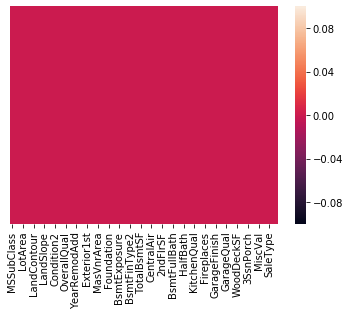

In [52]:
sns.heatmap(train.isnull(),yticklabels=False)


In [53]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [54]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [55]:
main_df=train.copy()

In [56]:
test_df=pd.read_csv('newtest.csv')

In [57]:
final_df=pd.concat([train,test_df],axis=0)

C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [58]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [59]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [60]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [61]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [62]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [63]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [64]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [67]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 175))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1200)

C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=175, units=50, kernel_initializer="he_uniform")`
  """
C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  
C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\sachin\.conda\envs\tensorflow1\lib\site-packages\ipykernel_launch

Train on 1137 samples, validate on 285 samples
Epoch 1/1200
1137/1137 [==============================] - 2s 2ms/step - loss: 167145.5443 - val_loss: 88993.3388
Epoch 2/1200
1137/1137 [==============================] - 1s 512us/step - loss: 74136.1744 - val_loss: 65858.6690
Epoch 3/1200
1137/1137 [==============================] - 1s 537us/step - loss: 67733.8839 - val_loss: 62870.6761
Epoch 4/1200
1137/1137 [==============================] - 1s 591us/step - loss: 63269.1799 - val_loss: 60449.6096
Epoch 5/1200
1137/1137 [==============================] - 1s 601us/step - loss: 59769.6243 - val_loss: 58218.9403
Epoch 6/1200
1137/1137 [==============================] - 1s 549us/step - loss: 56916.2355 - val_loss: 55869.9071
Epoch 7/1200
1137/1137 [==============================] - 1s 609us/step - loss: 53211.4082 - val_loss: 53772.3762
Epoch 8/1200
1137/1137 [==============================] - 1s 567us/step - loss: 50723.2639 - val_loss: 51931.7144
Epoch 9/1200
1137/1137 [==================

Epoch 72/1200
1137/1137 [==============================] - 1s 549us/step - loss: 32743.9419 - val_loss: 45840.0109
Epoch 73/1200
1137/1137 [==============================] - 1s 518us/step - loss: 33358.7341 - val_loss: 43970.6653
Epoch 74/1200
1137/1137 [==============================] - 1s 523us/step - loss: 32607.2111 - val_loss: 43742.5395
Epoch 75/1200
1137/1137 [==============================] - 1s 520us/step - loss: 32800.3099 - val_loss: 43751.9289
Epoch 76/1200
1137/1137 [==============================] - 1s 551us/step - loss: 32438.4881 - val_loss: 46710.0573
Epoch 77/1200
1137/1137 [==============================] - 1s 551us/step - loss: 32300.6192 - val_loss: 43697.8658
Epoch 78/1200
1137/1137 [==============================] - 1s 545us/step - loss: 32119.5190 - val_loss: 43969.4293
Epoch 79/1200
1137/1137 [==============================] - 1s 526us/step - loss: 32260.0147 - val_loss: 43691.3108
Epoch 80/1200
1137/1137 [==============================] - 1s 556us/step - loss:

Epoch 143/1200
1137/1137 [==============================] - 1s 577us/step - loss: 30070.6838 - val_loss: 43785.3718
Epoch 144/1200
1137/1137 [==============================] - 1s 562us/step - loss: 30423.4565 - val_loss: 43813.1603
Epoch 145/1200
1137/1137 [==============================] - 1s 588us/step - loss: 30469.4430 - val_loss: 43142.1094
Epoch 146/1200
1137/1137 [==============================] - 1s 574us/step - loss: 30328.6345 - val_loss: 45275.6153
Epoch 147/1200
1137/1137 [==============================] - 1s 581us/step - loss: 29983.5769 - val_loss: 44093.6018
Epoch 148/1200
1137/1137 [==============================] - 1s 530us/step - loss: 29790.2108 - val_loss: 43334.0836
Epoch 149/1200
1137/1137 [==============================] - 1s 522us/step - loss: 30285.2569 - val_loss: 43388.2650
Epoch 150/1200
1137/1137 [==============================] - 1s 526us/step - loss: 30266.1680 - val_loss: 43271.3420
Epoch 151/1200
1137/1137 [==============================] - 1s 528us/ste

1137/1137 [==============================] - 1s 575us/step - loss: 27870.0506 - val_loss: 42151.6638
Epoch 214/1200
1137/1137 [==============================] - 1s 567us/step - loss: 27610.3570 - val_loss: 42680.8707
Epoch 215/1200
1137/1137 [==============================] - 1s 580us/step - loss: 27755.9337 - val_loss: 42153.6633
Epoch 216/1200
1137/1137 [==============================] - 1s 523us/step - loss: 27374.6472 - val_loss: 41190.2820
Epoch 217/1200
1137/1137 [==============================] - 1s 525us/step - loss: 27699.9286 - val_loss: 41255.1598
Epoch 218/1200
1137/1137 [==============================] - 1s 530us/step - loss: 27035.4521 - val_loss: 41495.7274
Epoch 219/1200
1137/1137 [==============================] - 1s 525us/step - loss: 27410.9984 - val_loss: 42613.7175
Epoch 220/1200
1137/1137 [==============================] - 1s 556us/step - loss: 27575.1659 - val_loss: 42953.9184
Epoch 221/1200
1137/1137 [==============================] - 1s 531us/step - loss: 27063

Epoch 284/1200
1137/1137 [==============================] - 1s 594us/step - loss: 24433.5906 - val_loss: 38494.2527
Epoch 285/1200
1137/1137 [==============================] - 1s 533us/step - loss: 24829.9282 - val_loss: 38556.2682
Epoch 286/1200
1137/1137 [==============================] - 1s 523us/step - loss: 24496.7176 - val_loss: 38748.5084
Epoch 287/1200
1137/1137 [==============================] - 1s 547us/step - loss: 24685.1798 - val_loss: 38231.4379
Epoch 288/1200
1137/1137 [==============================] - 1s 589us/step - loss: 24302.6560 - val_loss: 38103.1030
Epoch 289/1200
1137/1137 [==============================] - 1s 527us/step - loss: 24498.6485 - val_loss: 42724.7778
Epoch 290/1200
1137/1137 [==============================] - 1s 540us/step - loss: 24894.2115 - val_loss: 39680.3188
Epoch 291/1200
1137/1137 [==============================] - 1s 530us/step - loss: 24842.7316 - val_loss: 38085.2196
Epoch 292/1200
1137/1137 [==============================] - 1s 564us/ste

1137/1137 [==============================] - 1s 599us/step - loss: 23168.1422 - val_loss: 37496.0304
Epoch 355/1200
1137/1137 [==============================] - 1s 542us/step - loss: 23492.5115 - val_loss: 35788.4031
Epoch 356/1200
1137/1137 [==============================] - 1s 587us/step - loss: 23920.9131 - val_loss: 35835.4877
Epoch 357/1200
1137/1137 [==============================] - 1s 603us/step - loss: 23631.1007 - val_loss: 36046.0378
Epoch 358/1200
1137/1137 [==============================] - 1s 568us/step - loss: 22866.1096 - val_loss: 35582.4382
Epoch 359/1200
1137/1137 [==============================] - 1s 541us/step - loss: 23359.9418 - val_loss: 35485.2344
Epoch 360/1200
1137/1137 [==============================] - 1s 597us/step - loss: 22850.7160 - val_loss: 37271.1640
Epoch 361/1200
1137/1137 [==============================] - 1s 584us/step - loss: 23054.6708 - val_loss: 35569.3010
Epoch 362/1200
1137/1137 [==============================] - 1s 539us/step - loss: 23677

Epoch 425/1200
1137/1137 [==============================] - 1s 553us/step - loss: 22041.8451 - val_loss: 36023.1076
Epoch 426/1200
1137/1137 [==============================] - 1s 548us/step - loss: 22196.7205 - val_loss: 36151.0050
Epoch 427/1200
1137/1137 [==============================] - 1s 527us/step - loss: 21970.6162 - val_loss: 35004.4105
Epoch 428/1200
1137/1137 [==============================] - 1s 552us/step - loss: 22099.7986 - val_loss: 36817.6402
Epoch 429/1200
1137/1137 [==============================] - 1s 551us/step - loss: 21701.3687 - val_loss: 36961.2111
Epoch 430/1200
1137/1137 [==============================] - 1s 538us/step - loss: 22171.2050 - val_loss: 35592.6549
Epoch 431/1200
1137/1137 [==============================] - 1s 586us/step - loss: 22094.2099 - val_loss: 35483.6453
Epoch 432/1200
1137/1137 [==============================] - 1s 554us/step - loss: 21967.6529 - val_loss: 33692.6554
Epoch 433/1200
1137/1137 [==============================] - 1s 539us/ste

1137/1137 [==============================] - 1s 544us/step - loss: 20170.2182 - val_loss: 33316.3722
Epoch 496/1200
1137/1137 [==============================] - 1s 568us/step - loss: 20138.2388 - val_loss: 33883.1193
Epoch 497/1200
1137/1137 [==============================] - 1s 585us/step - loss: 20962.7528 - val_loss: 32889.7699
Epoch 498/1200
1137/1137 [==============================] - 1s 561us/step - loss: 20024.6986 - val_loss: 33266.2194
Epoch 499/1200
1137/1137 [==============================] - 1s 525us/step - loss: 20836.8143 - val_loss: 32556.6902
Epoch 500/1200
1137/1137 [==============================] - 1s 508us/step - loss: 20197.5057 - val_loss: 34057.6933
Epoch 501/1200
1137/1137 [==============================] - 1s 521us/step - loss: 20283.7478 - val_loss: 32645.8965
Epoch 502/1200
1137/1137 [==============================] - 1s 519us/step - loss: 20084.5430 - val_loss: 32874.0335
Epoch 503/1200
1137/1137 [==============================] - 1s 529us/step - loss: 20110

Epoch 566/1200
1137/1137 [==============================] - 1s 524us/step - loss: 19030.3816 - val_loss: 32297.8196
Epoch 567/1200
1137/1137 [==============================] - 1s 519us/step - loss: 19282.9346 - val_loss: 31226.9783
Epoch 568/1200
1137/1137 [==============================] - 1s 562us/step - loss: 19050.2406 - val_loss: 31872.1372
Epoch 569/1200
1137/1137 [==============================] - 1s 548us/step - loss: 19966.0588 - val_loss: 32135.8336
Epoch 570/1200
1137/1137 [==============================] - 1s 592us/step - loss: 19596.3987 - val_loss: 31664.4848
Epoch 571/1200
1137/1137 [==============================] - 1s 547us/step - loss: 19517.8949 - val_loss: 32294.3261
Epoch 572/1200
1137/1137 [==============================] - 1s 521us/step - loss: 18981.2948 - val_loss: 33595.7755
Epoch 573/1200
1137/1137 [==============================] - 1s 536us/step - loss: 19559.2490 - val_loss: 32466.3949
Epoch 574/1200
1137/1137 [==============================] - 1s 572us/ste

1137/1137 [==============================] - 1s 582us/step - loss: 18246.7553 - val_loss: 30569.4653
Epoch 637/1200
1137/1137 [==============================] - 1s 525us/step - loss: 18046.6713 - val_loss: 30650.8663
Epoch 638/1200
1137/1137 [==============================] - 1s 562us/step - loss: 18880.4316 - val_loss: 30269.6055
Epoch 639/1200
1137/1137 [==============================] - 1s 540us/step - loss: 19157.0331 - val_loss: 30390.4011
Epoch 640/1200
1137/1137 [==============================] - 1s 573us/step - loss: 18876.4860 - val_loss: 30812.2442
Epoch 641/1200
1137/1137 [==============================] - 1s 567us/step - loss: 18430.6359 - val_loss: 34643.6363
Epoch 642/1200
1137/1137 [==============================] - 1s 522us/step - loss: 19387.4291 - val_loss: 30267.7451
Epoch 643/1200
1137/1137 [==============================] - 1s 539us/step - loss: 18153.5493 - val_loss: 30523.5755
Epoch 644/1200
1137/1137 [==============================] - 1s 525us/step - loss: 18463

Epoch 707/1200
1137/1137 [==============================] - 1s 546us/step - loss: 17724.7521 - val_loss: 29590.0006
Epoch 708/1200
1137/1137 [==============================] - 1s 536us/step - loss: 17941.7056 - val_loss: 29573.0544
Epoch 709/1200
1137/1137 [==============================] - 1s 583us/step - loss: 17438.1399 - val_loss: 29043.5934
Epoch 710/1200
1137/1137 [==============================] - 1s 613us/step - loss: 17563.0673 - val_loss: 29519.1571
Epoch 711/1200
1137/1137 [==============================] - 1s 593us/step - loss: 18791.0222 - val_loss: 29133.7525
Epoch 712/1200
1137/1137 [==============================] - 1s 535us/step - loss: 17701.0223 - val_loss: 29082.9157
Epoch 713/1200
1137/1137 [==============================] - 1s 552us/step - loss: 18038.5665 - val_loss: 29143.1792
Epoch 714/1200
1137/1137 [==============================] - 1s 529us/step - loss: 18145.4320 - val_loss: 31861.6020
Epoch 715/1200
1137/1137 [==============================] - 1s 566us/ste

1137/1137 [==============================] - 1s 594us/step - loss: 17677.3085 - val_loss: 28518.7126
Epoch 778/1200
1137/1137 [==============================] - 1s 572us/step - loss: 16939.7824 - val_loss: 29223.7181
Epoch 779/1200
1137/1137 [==============================] - 1s 547us/step - loss: 16433.0202 - val_loss: 28834.7350
Epoch 780/1200
1137/1137 [==============================] - 1s 589us/step - loss: 17479.5333 - val_loss: 28043.3155
Epoch 781/1200
1137/1137 [==============================] - 1s 562us/step - loss: 17255.7708 - val_loss: 29114.0119
Epoch 782/1200
1137/1137 [==============================] - 1s 514us/step - loss: 17955.2386 - val_loss: 27914.8339
Epoch 783/1200
1137/1137 [==============================] - 1s 590us/step - loss: 19059.4892 - val_loss: 28127.1107
Epoch 784/1200
1137/1137 [==============================] - 1s 616us/step - loss: 16952.2888 - val_loss: 28010.1740
Epoch 785/1200
1137/1137 [==============================] - 1s 568us/step - loss: 17050

Epoch 848/1200
1137/1137 [==============================] - 1s 567us/step - loss: 16508.3402 - val_loss: 27713.4826
Epoch 849/1200
1137/1137 [==============================] - 1s 533us/step - loss: 16217.4063 - val_loss: 27256.7165
Epoch 850/1200
1137/1137 [==============================] - 1s 518us/step - loss: 16995.8155 - val_loss: 27780.1186
Epoch 851/1200
1137/1137 [==============================] - 1s 540us/step - loss: 16746.2463 - val_loss: 27890.3531
Epoch 852/1200
1137/1137 [==============================] - 1s 535us/step - loss: 17289.6047 - val_loss: 27861.4362
Epoch 853/1200
1137/1137 [==============================] - 1s 532us/step - loss: 16596.8447 - val_loss: 28544.0446
Epoch 854/1200
1137/1137 [==============================] - 1s 541us/step - loss: 16458.5179 - val_loss: 26950.4179
Epoch 855/1200
1137/1137 [==============================] - 1s 547us/step - loss: 16762.6416 - val_loss: 28450.3703
Epoch 856/1200
1137/1137 [==============================] - 1s 517us/ste

1137/1137 [==============================] - 1s 578us/step - loss: 16120.9470 - val_loss: 26841.3479
Epoch 919/1200
1137/1137 [==============================] - 1s 532us/step - loss: 15409.6200 - val_loss: 26600.8377
Epoch 920/1200
1137/1137 [==============================] - 1s 552us/step - loss: 15536.9878 - val_loss: 27031.0971
Epoch 921/1200
1137/1137 [==============================] - 1s 538us/step - loss: 16011.4863 - val_loss: 29336.5913
Epoch 922/1200
1137/1137 [==============================] - 1s 558us/step - loss: 15911.5677 - val_loss: 29376.7270
Epoch 923/1200
1137/1137 [==============================] - 1s 560us/step - loss: 16580.3319 - val_loss: 26865.1589
Epoch 924/1200
1137/1137 [==============================] - 1s 504us/step - loss: 15639.3716 - val_loss: 27400.9302
Epoch 925/1200
1137/1137 [==============================] - 1s 547us/step - loss: 16811.4355 - val_loss: 27105.7484
Epoch 926/1200
1137/1137 [==============================] - 1s 594us/step - loss: 16027

Epoch 989/1200
1137/1137 [==============================] - 1s 589us/step - loss: 15274.6309 - val_loss: 26140.5189
Epoch 990/1200
1137/1137 [==============================] - 1s 576us/step - loss: 15476.9228 - val_loss: 26590.9805
Epoch 991/1200
1137/1137 [==============================] - 1s 568us/step - loss: 15158.2377 - val_loss: 27935.2328
Epoch 992/1200
1137/1137 [==============================] - 1s 555us/step - loss: 15437.2853 - val_loss: 26930.3214
Epoch 993/1200
1137/1137 [==============================] - 1s 565us/step - loss: 15414.6612 - val_loss: 26040.8350
Epoch 994/1200
1137/1137 [==============================] - 1s 536us/step - loss: 16275.9343 - val_loss: 27122.6482
Epoch 995/1200
1137/1137 [==============================] - 1s 548us/step - loss: 15341.6532 - val_loss: 25970.2121
Epoch 996/1200
1137/1137 [==============================] - 1s 539us/step - loss: 15648.3088 - val_loss: 27575.5363
Epoch 997/1200
1137/1137 [==============================] - 1s 536us/ste

1137/1137 [==============================] - 1s 589us/step - loss: 14871.0911 - val_loss: 26356.4520
Epoch 1060/1200
1137/1137 [==============================] - 1s 587us/step - loss: 14496.4978 - val_loss: 26632.3966
Epoch 1061/1200
1137/1137 [==============================] - 1s 589us/step - loss: 15269.7114 - val_loss: 26428.1748
Epoch 1062/1200
1137/1137 [==============================] - 1s 552us/step - loss: 14945.7923 - val_loss: 26453.2520
Epoch 1063/1200
1137/1137 [==============================] - 1s 579us/step - loss: 14941.7480 - val_loss: 25890.6027
Epoch 1064/1200
1137/1137 [==============================] - 1s 582us/step - loss: 15389.1332 - val_loss: 28080.7367
Epoch 1065/1200
1137/1137 [==============================] - 1s 532us/step - loss: 14643.0492 - val_loss: 26478.0723
Epoch 1066/1200
1137/1137 [==============================] - 1s 521us/step - loss: 15031.4529 - val_loss: 25780.6788
Epoch 1067/1200
1137/1137 [==============================] - 1s 564us/step - los

1137/1137 [==============================] - 1s 529us/step - loss: 14521.6656 - val_loss: 26274.1859
Epoch 1130/1200
1137/1137 [==============================] - 1s 557us/step - loss: 14818.3061 - val_loss: 25782.2273
Epoch 1131/1200
1137/1137 [==============================] - 1s 573us/step - loss: 14539.6854 - val_loss: 29045.1112
Epoch 1132/1200
1137/1137 [==============================] - 1s 599us/step - loss: 14513.3440 - val_loss: 26114.3362
Epoch 1133/1200
1137/1137 [==============================] - 1s 559us/step - loss: 14332.1713 - val_loss: 25991.6160
Epoch 1134/1200
1137/1137 [==============================] - 1s 539us/step - loss: 14747.2613 - val_loss: 26542.4702
Epoch 1135/1200
1137/1137 [==============================] - 1s 575us/step - loss: 15087.7674 - val_loss: 26253.5417
Epoch 1136/1200
1137/1137 [==============================] - 1s 572us/step - loss: 14627.7665 - val_loss: 25722.1377
Epoch 1137/1200
1137/1137 [==============================] - 1s 538us/step - los

1137/1137 [==============================] - 1s 526us/step - loss: 14203.3856 - val_loss: 25818.4382
Epoch 1200/1200
1137/1137 [==============================] - 1s 538us/step - loss: 14497.0919 - val_loss: 25735.0952


In [72]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [73]:
#Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv(r'D:\Manipal Data Science\Kaggle\t\sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [71]:
pred.head()

,0
0,139293.546875
1,112697.468750
2,140688.296875
3,140858.156250
4,266450.187500
